In [1]:
import keras
from keras import layers

encoding_dim = 32  
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [4]:
# Separate encoder/decoder model
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#Configuring model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1445 - val_loss: 0.1339
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1288 - val_loss: 0.1215
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1187 - val_loss: 0.1133
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1117 - val_loss: 0.1076
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1067 - val_loss: 0.1032
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1027 - val_loss: 0.0999
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0998 - val_loss: 0.0974
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0963 - val_loss: 0.0944
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0953 - val_loss: 0.0937

In [11]:
# Now going to upsample
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

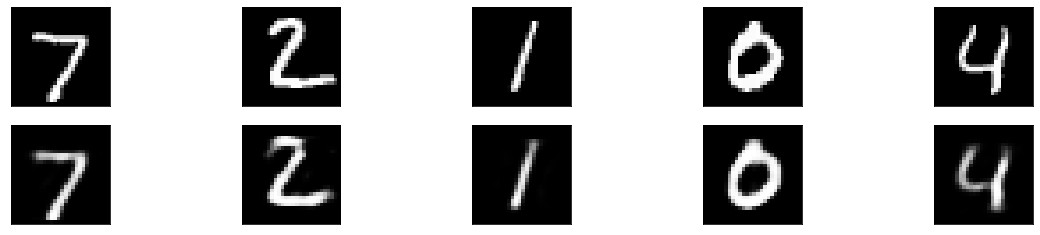

In [14]:
import matplotlib.pyplot as plt
#Number of digits to display
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer <<--- 
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [16]:
# Building multiple layers 
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [17]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.3430 - val_loss: 0.1690
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1600 - val_loss: 0.1377
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1352 - val_loss: 0.1253
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1251 - val_loss: 0.1185
Epoch 5/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1179 - val_loss: 0.1127
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1132 - val_loss: 0.1102
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1098 - val_loss: 0.1064
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1070 - val_loss: 0.1041
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1050 - val_loss: 0.1021
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.103

In [18]:
#Building a CNN
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [20]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                ## Question about Tensorboard on GoogleCoLab

Epoch 1/50


ValueError: ignored